# TensorFlow
### Deep Learning
### Neural Networks
### 环境搭建详细教程
- Windows 10
- Ubuntu 18.04/16.04/20.04
- TensorFlow
- PyTorch
- CUDA cuDNN
- Jupyter Lab & Jupyter Notebook
- PyCharm

[环境搭建详细教程——GitHub-Blog](https://2694048168.github.io/)

[环境搭建详细教程——Gitee-Blog](http://weili_yzzcq.gitee.io/)

[环境搭建详细教程——CSDN-Blog](https://blog.csdn.net/weixin_46782218)


In [6]:
# 线性回归
# make decisions: discrete 离散值     continuous 连续值
# continuous prediction：input data（x）；prediction（f，参数 θ theta）；real data，ground-truth（y）
# linear equation 线性方程组 y = w * x + b + epsilon
# with noise  epsilon 噪声 高斯分布
# find the W and b
# loss = (WX + b - Y)**2
# miniize loss 
# gradient descent GD 梯度下降 一维和二维可视化
# loss surface
# linear regression
# logistic regression
# classification

import numpy as np

# 生成 csv 文件里面的数据
# data = []
# for i in range(100):
# 	x = np.random.uniform(3., 12.)
# 	# mean=0, std=0.1
# 	eps = np.random.normal(0., 0.1)
# 	y = 1.477 * x + 0.089 + eps
# 	data.append([x, y])
# data = np.array(data)
# print(data.shape, data)

# cpmputer loss
# Y = W*X +b
def computer_error_for_line_given_points(b, w, points):
    total_error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # computer mean-squared-error
        total_error += ((w * x + b) - y) ** 2
        # total_error += (y - (w * x + b)) ** 2
    # average loss for each point
    return total_error / float(len(points))

# computer Gradient and update
def step_gradient(b_current, w_current, points, learning_rate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx + b - y)
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        # grad_w = 2(wx + b - y) * x
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
    # update the grad_w, and the grad_b
    new_b = b_current - (learning_rate * b_gradient)
    new_w = w_current - (learning_rate * w_gradient)
    return [new_b, new_w]

# set w = w_new and loop
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]


# running the linear regression model
# loading the data for numpy from the data.cvs file
# the data shape is 100 * 2 (row * column)
points = np.genfromtxt("./datasets/data.csv", delimiter=",")
# init the Hyperparameter
learning_rate = 0.0001
initial_b = 0
initial_w = 0
num_iterations = 1000
# show the initial Hyperparameter for linear regression model and the error
print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
      .format(initial_b, initial_w, computer_error_for_line_given_points(initial_b, initial_w, points)))

print("Running")
# iterations = 1000,computer the Hyperparameter for linear regression model
[b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)

# and show the Hyperparameter for linear regression model and the error
print("After {0} iterations b = {1}, w = {2}, error = {3}"
      .format(num_iterations, b, w, computer_error_for_line_given_points(b, w, points)))


Starting gradient descent at b = 0, w = 0, error = 5565.107834483211
Running
After 1000 iterations b = 0.08893651993741346, w = 1.4777440851894448, error = 112.61481011613473


In [13]:
# Image Classification
# hand-written digits recognition
# MNIST: 7,000 images per category = 70,000
# train / test splitting = 60k / 10k
# [28, 28, 1] = [rows,columns, gray_value]
# 28 * 28 = 784 转换为一维数组
# input and output
# coding the features for data: one-hot
# regression VS classification
# y = w * x + b
# y 属于空间 R^d
# out = X @ W + b
# out:[0.1, 0.8, 0.02,.0.08] = 1 概率，最大值概率称之为置信度
# pred = argmax(out)

# out = X @ W + b
# X = [b, 784]
# W = [784, 10]
# b = [10]

# it is linear !
# out = X @ W + b
# 变成 non-linear !
# out = f(X @ W + b)
# 引入非线性因子，这个 f 函数称之为激活函数，
# f = ReLu function and sigmoid function
# out = relu(X @ W + b)

# it is simple
# out = relu(X @ W + b)
# 添加隐藏层 hide layer
# h1 = relu(X @ W1 + b1)
# h2 = relu(X @ W2 + b2)
# out = relu(X @ W3 + b3)

# particularly
# 每一层都是类似降维的过程，直到从 [1, 784] ---- [1, 10]
# X = [v1, v2, ... , v784]
# h1 = relu(X @ W1 + b1)
#    W1: [784, 512]
#    b1: [1, 512]
# h2 = relu(X @ W2 + b2)
#    W2: [512, 256]
#    b2: [1, 256]
# out = relu(X @ W3 + b3)
#    W2: [256, 10]
#    b2: [1, 10]

# loss
# out:[1, 10]
# Y/label: 0-9 （one-hot）
# euclidean distance 计算欧式距离 使得 out 接近 label   MSE
# loss = (Y - out) **2

# in a nutshell
# out = relu{relu{relu[X @ W1 + b1] @ W2 + b2 } @ W3 + b3}
# pred = argmax(out)
# loss = MSE(out, label)
# minimize loss
# [w1_new, b2_new, w2_new, b2_new, w3_new, b3_new]

# Deep Learning
# classification precedure
# step1 compute [h1, h2, out]
# step2 compute loss
# step3 compute gradient and update [w1_new, b2_new, w2_new, b2_new, w3_new, b3_new]
# step4 loop
# need TensorFlow

# 以下两条语句，使得 TensorFlow 少打印出一些无关紧要的信息
# import  os
# os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

# step 0 loading data X and Y
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers

(x, y), (x_val, y_val) = datasets.mnist.load_data() 
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)
y = tf.one_hot(y, depth=10)
print(x.shape, y.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
# batch 概念
train_dataset = train_dataset.batch(200)
    
# step 0 model NN
model = tf.keras.Sequential([layers.Dense(512, activation="relu"),
                          layers.Dense(256, activation="relu"),
                          layers.Dense(10)])

optimizer = optimizers.SGD(learning_rate=0.001)

# 对整个训练集 训练 30 次，即就是 epoch = 30 
# 将训练集数据划分为每次读取 200 ，即就是 batch = 200
# 那么 step = train_data / batch = 60k / 200 = 300
# 每训练 100 个样本数据，就查看一次训练情况 loss
# 实际显示的 loss 情况次数 = epoch * (step / 100) = 30 * (300/100) = 90

# step4 loop
# 对一个数据集 dataset 训练一次称之为 epoch
def train_epoch(epoch):
    # 对一个 batch 训练一次称之为 step
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # [b， 28， 28] => [b, 784]
            x = tf.reshape(x, (-1, 28*28))
            # step 1 compute output
            # [b, 784] => [b, 10]
            out = model(x)
            # step2 compute loss
            loss = tf.reduce_sum(tf.square(out - y)) / x.shape[0]
            
        # step 3 optimize and update w1, w2, w3, b1, b2, b3
        grads = tape.gradient(loss, model.trainable_variables)
        # w_new = w - lr * grad
        optimizer.apply_gradients(zip(grads, model.trainable_variables)) 
        
        if step % 100 == 0:
            # print(epoch, step, 'loss:', loss.numpy())
            print("第 {0} 次 epoch，第 {1} step，该次训练 loss = {2}".format(epoch, step+100, loss.numpy()))

# 对整个数据集训练多次 30 次
for epoch in range(30):
    train_epoch(epoch)


(60000, 28, 28) (60000, 10)
0 0 2.145007
0 100 0.9779064
0 200 0.8011861
1 0 0.682101
1 100 0.68953323
1 200 0.59687996
2 0 0.5544969
2 100 0.60021234
2 200 0.5208171
3 0 0.49560317
3 100 0.5510172
3 200 0.4770015
4 0 0.45830703
4 100 0.51574916
4 200 0.44660082
5 0 0.4310113
5 100 0.48866108
5 200 0.42332447
6 0 0.40955436
6 100 0.46667328
6 200 0.40453193
7 0 0.3919871
7 100 0.44810033
7 200 0.38870093
8 0 0.37698773
8 100 0.4321654
8 200 0.3749433
9 0 0.3639257
9 100 0.41827995
9 200 0.3629041
10 0 0.35239592
10 100 0.40607452
10 200 0.35226172
11 0 0.34209
11 100 0.39520663
11 200 0.34277108
12 0 0.33278885
12 100 0.38533977
12 200 0.33422118
13 0 0.3244313
13 100 0.37634808
13 200 0.32637382
14 0 0.3167131
14 100 0.3681502
14 200 0.3191441
15 0 0.30964595
15 100 0.36062518
15 200 0.31245127
16 0 0.30311885
16 100 0.3536573
16 200 0.30619872
17 0 0.2970287
17 100 0.34722012
17 200 0.3003191
18 0 0.29140472
18 100 0.34124565
18 200 0.29482606
19 0 0.28617287
19 100 0.33563197
19 200

In [14]:
# TensorFlow 数据类型
# data container: list, np.array, tf.Tensor
# what is Tensor
# - scalar 标量 1.1
# - vector 向量 [1.1], [1.1, 2.2]
# - matrix 矩阵 [[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]
# - tensor rank > 2 矩阵的秩
# TF is a computing lib
# - int, float, double, bool, string

import tensorflow as tf

# create the int, float, double, bool, string
tf.constant(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [15]:
tf.constant(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [17]:
# tf.constant(1.2, dtype=tf.int32)
# TypeError: Cannot convert 1.2 to EagerTensor of dtype int32

In [18]:
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [19]:
tf.constant("Hello World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [27]:
# Tensor Property 常见属性
with tf.device("cpu"):
    const_cpu = tf.constant([1])

with tf.device("gpu"):
    const_gpu = tf.range(4)
    
# device 属性，查看 Tensor 在哪一个设备上 CPU or GPU
const_cpu.device

'/job:localhost/replica:0/task:0/device:CPU:0'

In [28]:
const_gpu.device
# 因为本地没有安装 GPU 加速驱动 CUDA 和 cuDNN
# 无法提供 GPU 加速环境，故此工作环境依旧还在 CPU 上

'/job:localhost/replica:0/task:0/device:CPU:0'

In [29]:
# 相互转换 
# const_cpu_to_gpu = const_cpu.gpu()
# const_cpu_to_gpu.device

const_gpu_to_cpu = tf.identity(const_gpu)
const_gpu_to_cpu.device

# tensor 的计算必须在同一设备进行，全部都是 CPU 或者全部都是 GPU

'/job:localhost/replica:0/task:0/device:CPU:0'

In [30]:
# numpy 属性，将 Tensor 转换为 numpy
# numpy 是在 CPU 上的
const_gpu.numpy()

array([0, 1, 2, 3])

In [31]:
# 查看 Tensor 的 shape 维度
# ndim 属性，返回 Tensor 的维度信息
# rank 方法，返回 Tensor 的维度信息
const_cpu.ndim

1

In [32]:
tf.rank(const_cpu)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [33]:
tf.rank(tf.ones([3, 2, 4]))

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [35]:
# 判断是否 Tensor
tf.is_tensor(const_cpu)


True

In [39]:
# 转换为 Tensor
const = np.arange(5)
const_tensor = tf.convert_to_tensor(const)
const_tensor

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [36]:
# convert dtype
# 数值类型之间的转换
const_cpu.dtype

tf.int32

In [40]:
tf.cast(const_tensor, dtype=tf.float32)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

In [41]:
tf.cast(const_tensor, dtype=tf.double)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 2., 3., 4.])>

In [42]:
tf.cast(const_tensor, dtype=tf.int32)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [44]:
# int <==> bool
bool_num = tf.constant([0, 1])
bool_num_bool = tf.cast(bool_num, dtype=tf.bool)
bool_num_bool

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([False,  True])>

In [45]:
tf.cast(bool_num_bool, tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 1])>

In [46]:
# tf.Variable
# 一般是需要优化的变量参数
a = tf.range(5)
a

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [47]:
b = tf.Variable(a)
b

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [48]:
b.dtype

tf.int32

In [49]:
b.name

'Variable:0'

In [51]:
b.trainable
# 需要梯度信息，可以自动求导
# 神经网络的参数需求

True

In [52]:
tf.is_tensor(b)

True

In [53]:
b.numpy()

array([0, 1, 2, 3, 4])

In [1]:
# 创建 Tensor
# from numpy, list
# zeros, ones
# fill
# random
# constant
# Applicatin

# meta-learning

# Tensor 索引和切片
# selecetive indexing
# tf.gather() , tf.gather_nd(), tf.boolean_mask()

# 维度变换
# shape, ndim
# reshape
# expand_dims, squeeze
# transpose
# broadcast_to

# 数学计算
# +, -, *, /, **, pow, square, sqrt, //, %, exp, log, @, matmul
# element_wise, matrix_wise, dim_wise, 
# 元素级计算，矩阵级计算，维度级计算


In [5]:
# import  os
# 复制 0， 1， 2，打印 c++ 一些信息
# 0 打印全部信息
# 2 只打印 error 信息
# os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

# loading the dataset MNIST
(x, y), _ = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())

# x : [0-255] -> [0-1.]
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))

# set the batch
train_db = tf.data.Dataset.from_tensor_slices((x, y)).batch(128)

# set the iteration
train_iter = iter(train_db)
sample = next(train_iter)

datasets: (60000, 28, 28) (60000,) 0 255
(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(255.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)


In [12]:
# 前向传播 forward
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

# loading data
(x, y), _ = datasets.mnist.load_data()

# convert to Tensor
# x : [0-255] -> [0-1.]
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

# show the info
print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))

# set the dataset and split the batch
train_db = tf.data.Dataset.from_tensor_slices((x, y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print("batch", sample[0].shape, sample[1].shape)

# 权值
# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]
# tf.Variable 才会自动记录梯度信息，tf.Tensor 不会记录梯度信息，故此值为 None，类型为 NoneType
# 需要给一个好点的初始值，否则容易 loss 爆炸，出现 nan(not a number) 情况,stddev=0.1 方差给小一点
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

# 学习率 ，步长 10^-3
learning_rate = 1e-3

# 对数据集迭代 10 次
for epoch in range(10):
    # 对数据集一次循环
    for step, (x, y) in enumerate(train_db):
        # x [128, 28, 28]
        # y [128]
        # 进行维度转换 [128, 28, 28] => [b, 28*28]
        x = tf.reshape(x, [-1, 28*28])   
    
        # 自动求导过程,梯度
        with tf.GradientTape() as tape:
            # x [b, 28*28]
            # h1 = x@w1 + b1
            # [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            # 添加非线性，relu 激活函数
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2@w3 +b3
        
            # compute loss
            # out [b, 10]
            # y [b] => [b, 10]
            y_one_hot = tf.one_hot(y, depth=10)
        
            # MSE = mean((y - out)**2)
            loss = tf.square(y_one_hot - out)
            # mean: scalar
            loss = tf.reduce_mean(loss)
    
        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        # 原地更新，否则就返回 tf.Tensor 类型了，无法进行下一个梯度更新
        # w1 = w1 - learning_rate * grads[0]
        w1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        w2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])
        w3.assign_sub(learning_rate * grads[4])
        b3.assign_sub(learning_rate * grads[5])
    
        if step % 100 == 0:
            print(epoch, step, "loss", float(loss))

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
batch (128, 28, 28) (128,)
0 0 loss 0.42511042952537537
0 100 loss 0.1789942979812622
0 200 loss 0.16580988466739655
0 300 loss 0.1560211181640625
0 400 loss 0.1542573869228363
1 0 loss 0.1479978859424591
1 100 loss 0.1321682631969452
1 200 loss 0.13824641704559326
1 300 loss 0.13372421264648438
1 400 loss 0.13392488658428192
2 0 loss 0.12848277390003204
2 100 loss 0.11817771196365356
2 200 loss 0.12388703972101212
2 300 loss 0.11938042938709259
2 400 loss 0.12050290405750275
3 0 loss 0.11577292531728745
3 100 loss 0.10877491533756256
3 200 loss 0.11369021236896515
3 300 loss 0.1092468723654747
3 400 loss 0.11090860515832901
4 0 loss 0.10678441822528839
4 100 loss 0.10189224779605865
4 200 loss 0.10604660212993622
4 300 loss 0.10167856514453888
4 400 loss 0.10369563102722168
5

In [25]:
# Tensor 张量的合并和分割
# tf.concat 合并
# tf.split  分割
# tf.stack 合并
# tf.unstack 分割

# 数据统计
# tf.norm 范数概念
# tf.reduce_min/max/mean
# tf.argmax/argminx
# tf.equal
# tf.unique

# 张量排序 Tensor 排序
# tf.sort、tf.argsort
# top_k
# top_k compute of accuracy

# 填充与复制
# pad
# tile
# broadcast_to

# 张量限幅
# clip_by_value
# relu
# clip_by_norm
# gradient clipping

# 高阶操作
# where
# scatter_nd
# meshgrid


In [30]:
# 数据集加载
# keras.datasets
# tf.data.Dataset.from_tensor_sclices : shuffle, map, batch, repeat
# input pipeline
# such as : boston housing, mnist/fashion mnist, cifar10/100, imdb

# 前向传播 forward
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

# loading data
(x, y), (x_test, y_test) = datasets.mnist.load_data()

# convert to Tensor
# x : [0-255] -> [0-1.]
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) / 255.
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# show the info
print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))

# set the dataset and split the batch
train_db = tf.data.Dataset.from_tensor_slices((x, y)).batch(128)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(128)

train_iter = iter(train_db)
sample = next(train_iter)
print("batch", sample[0].shape, sample[1].shape)

# 权值
# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]
# tf.Variable 才会自动记录梯度信息，tf.Tensor 不会记录梯度信息，故此值为 None，类型为 NoneType
# 需要给一个好点的初始值，否则容易 loss 爆炸，出现 nan(not a number) 情况,stddev=0.1 方差给小一点
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

# 学习率 ，步长 10^-3
learning_rate = 1e-3

# 对数据集迭代 100 次
# for epoch in range(10): # test acc = 0.5566
for epoch in range(100): # test acc = 0.8531
    # 对数据集一次循环
    for step, (x, y) in enumerate(train_db):
        # x [128, 28, 28]
        # y [128]
        # 进行维度转换 [128, 28, 28] => [b, 28*28]
        x = tf.reshape(x, [-1, 28*28])   
    
        # 自动求导过程,梯度
        with tf.GradientTape() as tape:
            # x [b, 28*28]
            # h1 = x@w1 + b1
            # [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            # 添加非线性，relu 激活函数
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1@w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2@w3 +b3
        
            # compute loss
            # out [b, 10]
            # y [b] => [b, 10]
            y_one_hot = tf.one_hot(y, depth=10)
        
            # MSE = mean((y - out)**2)
            loss = tf.square(y_one_hot - out)
            # mean: scalar
            loss = tf.reduce_mean(loss)
    
        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        # 原地更新，否则就返回 tf.Tensor 类型了，无法进行下一个梯度更新
        # w1 = w1 - learning_rate * grads[0]
        w1.assign_sub(learning_rate * grads[0])
        b1.assign_sub(learning_rate * grads[1])
        w2.assign_sub(learning_rate * grads[2])
        b2.assign_sub(learning_rate * grads[3])
        w3.assign_sub(learning_rate * grads[4])
        b3.assign_sub(learning_rate * grads[5])
    
        if step % 100 == 0:
            print(epoch, step, "loss", float(loss))
    
    # test/evluation
    total_correct, total_num = 0, 0
    for step, (x, y) in enumerate(test_db):
        x = tf.reshape(x, [-1, 28*28])
        
        h1 = tf.nn.relu(x@w1 + b1)
        h2 = tf.nn.relu(h1@w2 + b2)        
        out = h2@w3 + b3
        
        prob = tf.nn.softmax(out, axis=1)
        pred = tf.argmax(prob, axis=1)
        pred = tf.cast(pred, dtype=tf.int32)
        correct = tf.cast(tf.equal(pred, y), dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        
        total_correct += int(correct)
        total_num += x.shape[0]
        
    acc = total_correct / total_num
    print("test acc : ", acc)

(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
batch (128, 28, 28) (128,)
0 0 loss 0.38115018606185913
0 100 loss 0.2140667885541916
0 200 loss 0.17352941632270813
0 300 loss 0.17252981662750244
0 400 loss 0.1654943823814392
test acc :  0.1447
1 0 loss 0.155382439494133
1 100 loss 0.1564989537000656
1 200 loss 0.1401979923248291
1 300 loss 0.14494988322257996
1 400 loss 0.1413814276456833
test acc :  0.1958
2 0 loss 0.13282153010368347
2 100 loss 0.13779962062835693
2 200 loss 0.12248848378658295
2 300 loss 0.12837831676006317
2 400 loss 0.12546643614768982
test acc :  0.2617
3 0 loss 0.11781013011932373
3 100 loss 0.1250159740447998
3 200 loss 0.11026396602392197
3 300 loss 0.11668787151575089
3 400 loss 0.11417224258184433
test acc :  0.3339
4 0 loss 0.10710453987121582
4 100 loss 0.11570942401885986
4 200 loss 0.1013165

In [31]:
# 全连接层
# matmul
# neural network
# deep learning
# multi-layer

import tensorflow as tf
from tensorflow import keras

x = tf.random.normal([2, 3])

model = keras.Sequential([
        keras.layers.Dense(2, activation="relu"),
        keras.layers.Dense(2, activation="relu"),
        keras.layers.Dense(2)]) # 没有加 relu 非线性的这一层，称之为 logits

model.build(input_shape=[None, 3])
model.summary()

for p in model.trainable_variables:
    print(p.name, p.shape)
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8         
_________________________________________________________________
dense_1 (Dense)              multiple                  6         
_________________________________________________________________
dense_2 (Dense)              multiple                  6         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
dense/kernel:0 (3, 2)
dense/bias:0 (2,)
dense_1/kernel:0 (2, 2)
dense_1/bias:0 (2,)
dense_2/kernel:0 (2, 2)
dense_2/bias:0 (2,)


In [32]:
# 输出方式
# such as : R 整个实数集，[0-1]输出概率值，[0-1]&所有概率和为1，[-1-1]范围
# tf.sigmoid => [0-1] => sigmoid 激活函数以及压缩
# tf.nn.softmax => [0-1]&所有概率之和为 1 => softmax 函数
# tf.tanh => [-1 -1] => 通过 sigmoid 函数扩大到 [0-2],然后平移到 [-1 -1]


In [33]:
# 损失函数
# MSE
# Cross Entropy Loss 熵 交叉熵 散度
# Hinge Loss


In [35]:
# 梯度下降
# gradient descent
# auto gradient
# with tf.GradientTape() as tape:
# 二阶求导  2nd-order

import tensorflow as tf

w = tf.Variable(1.0)
b = tf.Variable(2.0)
x = tf.Variable(3.0)

# 二阶求导
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x * w + b
    dy_dw, dy_db = tape2.gradient(y, [w, b])
d2y_dw2 = tape1.gradient(dy_dw, w)

print(dy_dw)
print(dy_db)
print(d2y_dw2)

assert dy_dw.numpy() == 3.0
assert d2y_dw2 is None


tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
None


In [1]:
# activation functions 激活函数
# 激活函数及其梯度
# 温水煮青蛙
# sigmoid logistic

# loss及其梯度
# softmax

# 单输出感知器模型及其梯度
# Single-output Perceptron
import tensorflow as tf

x = tf.random.normal([1, 3])
w = tf.ones([3, 1])
b = tf.ones([1])
y = tf.constant([1])

with tf.GradientTape() as tape:
    tape.watch([w, b])
    logits = tf.sigmoid(x@w +b)
    loss = tf.reduce_mean(tf.losses.MSE(y, logits))
    
grads = tape.gradient(loss, [w, b])
print(grads[0])
print(grads[1])


tf.Tensor(
[[ 0.03023818]
 [-0.04783473]
 [ 0.2962501 ]], shape=(3, 1), dtype=float32)
tf.Tensor([-0.25907284], shape=(1,), dtype=float32)


In [3]:
# 多输出感知器模型及其梯度
# Multi-output Perceptron
import tensorflow as tf

x = tf.random.normal([2, 4])
w = tf.random.normal([4, 3])
b = tf.zeros([3])
y = tf.constant([2, 0])

with tf.GradientTape() as tape:
    tape.watch([w, b])
    prob = tf.nn.softmax(x@w + b, axis=1)
    loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y, depth=3), prob))
    
grads = tape.gradient(loss, [w, b])
print(grads[0])
print(grads[1])


tf.Tensor(
[[-0.00572357  0.00910154 -0.00337799]
 [-0.00269983  0.02833442 -0.0256346 ]
 [ 0.00435749 -0.18683618  0.18247873]
 [-0.00581362  0.02845965 -0.02264604]], shape=(4, 3), dtype=float32)
tf.Tensor([-0.00692527  0.05489153 -0.04796629], shape=(3,), dtype=float32)


x, y range:  (120,) (120,)
X, Y maps:  (120, 120) (120, 120)


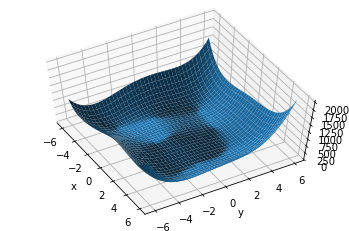

step 0: x = [ 3.26       -0.09999999], f(x) = 34.0
step 20: x = [ 3.54679   -1.4388103], f(x) = 2.747403860092163
step 40: x = [ 3.5843565 -1.8473401], f(x) = 1.7569736883160658e-05
step 60: x = [ 3.5844283 -1.8481257], f(x) = 2.3646862246096134e-11
step 80: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 100: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 120: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 140: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 160: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 180: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13


In [32]:
# 链式法则
# chain rule
# 神经网络层 权值不断更新

# 多层感知器 
# Multi-Layer Perceptron
# 反向传播算法

# Himmelblau 函数优化
# f(x, y) = (x**2 + y - 11)**2 + (x + y**2 -7)**2
# Himmelblau function 常用于测试算法模型
# Himmelblau 方程，是科学家们研究出来专门用于检测一个优化器效果的方程
# 四个点（最小值）精确解
# f(3.0, 2.0) = 0.0; f(-2.805118, 3.131312) = 0.0; f(-3.779310, -3.283186) = 0.0; f(3.584428, -1.848126) = 0.0; 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# This is important for 3d plotting 
from mpl_toolkits.mplot3d import Axes3D 

def himmelblau(x):
    return (x[0] **2 + x[1] - 11) **2 + (x[0] + x[1] **2 - 7) **2

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print("x, y range: ", x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print("X, Y maps: ", X.shape, Y.shape)
Z = himmelblau([X, Y])

# 可视化 himmelblau 函数
fig = plt.figure("himmelblau")
# ax = fig.add_subplot(1, 1, 1, projection='3d')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


# gradient descent
# 初始点位置
# x = tf.constant([-4., 0.])
x = tf.constant([4., 0.])

for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
        
    grads = tape.gradient(y, [x])[0]
    x -= 0.01 * grads
    
    if step % 20 == 0:
        print("step {}: x = {}, f(x) = {}".format(step, x.numpy(), y.numpy()))

In [43]:
# Fashion MNIST
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

# data processing 数据预处理函数
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)
    return x, y
    
# loading dataset
(x, y), (x_test, y_test) = datasets.fashion_mnist.load_data()
print(x.shape, y.shape, x_test.shape, y_test.shape)

# 构造 TensorFlow 需求的数据集
db_train = tf.data.Dataset.from_tensor_slices((x, y))
# 数据预处理 映射函数即可
db_train = db_train.map(preprocess)
# shuffle and batch 操作
batch_size = 128
db_train = db_train.shuffle(10000).batch(batch_size)

db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# 数据预处理 映射函数即可
db_test = db_test.map(preprocess)
# shuffle and batch 操作
db_test = db_test.shuffle(10000).batch(batch_size)

# sample 操作
db_train_iter = iter(db_train)
sample = next(db_train_iter)
print("batch: ", sample[0].shape, sample[1].shape)

# 神经网络层构建
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(10)])

model.build(input_shape=[None, 28*28])
model.summary()

# 优化器 learning_rate
# w = w - lrarning_rete * gradient
optimizer = optimizers.Adam(lr=1e-3)

def main():
    # 对数据集循环训练多少次 epoch
    for epoch in range(10):
        # 对每个 batch 循环训练
        for step, (x, y) in enumerate(db_train):
            # 维度转换
            # x: [b, 28, 28] => [b, 784]
            # y: [b]
            x = tf.reshape(x, [-1, 28*28])
            # 跟踪梯度信息，自动求导
            with tf.GradientTape() as tape:
                # [b, 784] => [b, 10]
                logits = model(x)
                # compute loss
                y_one_hot = tf.one_hot(y, depth=10)
                # [b]
                loss_mse = tf.reduce_mean(tf.losses.MSE(y_one_hot, logits))
                loss_ce = tf.losses.categorical_crossentropy(y_one_hot, logits, from_logits=True)
                loss_ce = tf.reduce_mean(loss_ce)
            
            # 获取梯度
            grads = tape.gradient(loss_ce, model.trainable_variables)
            # grads = tape.gradient(loss_mse, model.trainable_variables)
            # 更新梯度
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            
            # 每 100 次训练后查看 loss
            if step % 100 == 0:
                print(epoch, step, " loss: ", float(loss_ce), float(loss_mse))
        
        # test
        # 统计正确个数
        total_correct = 0
        total_num = 0
        for x, y in db_test:
            # 维度变换
            x = tf.reshape(x, [-1, 28*28])
            # [b, 10]
            logits = model(x)
            # 计算概率最大的位置索引
            # logits => prob,  [b, 10]
            prob = tf.nn.softmax(logits, axis=1)
            # [b, 10] => [b] pred
            pred = tf.argmax(prob, axis=1)
            pred = tf.cast(pred, dtype=tf.int32)
            # 不需要 one_hot 编码
            # correct : [b], True: equal; False: not equal
            correct = tf.equal(pred, y)
            # 将 bool 转换为 int （1或者0）
            correct = tf.cast(correct, dtype=tf.int32)
            # 计算正确个数
            correct = tf.reduce_sum(correct)
            
            total_correct += int(correct)
            total_num += x.shape[0]
            
        # compute the accurate
        acc = total_correct / total_num
        print(epoch, "test acc : ", acc)
            

# if __name__ == " __main__":
main()

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
batch:  (128, 28, 28) (128,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             multiple                  200960    
_________________________________________________________________
dense_41 (Dense)             multiple                  32896     
_________________________________________________________________
dense_42 (Dense)             multiple                  8256      
_________________________________________________________________
dense_43 (Dense)             multiple                  2080      
_________________________________________________________________
dense_44 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
0 0  loss:  2.3147687911987305 0.19

In [1]:
# TensorFlow 可视化 Tensor 在数据流中 flow 过程
# Visdom 可视化
# 监控数据流 TensorBoard
# tensorboard 会监听磁盘数据变换，使用 web UI 界面展示出来
# 1、installation 2、curves 3、image visualization
# principle：1、listen logdir 2、build summary instance 3、fed data into summary instance
# steps：
# step 1、run listener：cmd; cd logdir; tensorboard --logdir logs; web site:6006
# step 2、buld summary: 代码中实现 
# =================================================================
# current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# log_dir = "logs" + current_time
# summary_writer = tf.summary.create_file_writer(log_dir)
# =================================================================
# step 3、feed scalar: 代码中实现 
# =================================================================
# wtih summary_writer.as_default():
#     tf.summary.scalar("loss", float(loss), step=epoch)
#     tf.summary.scalar("accuracy", float(train_accuracy), step=epoch)
# =================================================================
# step 4、feed single image or multi-images: 代码中实现
# 


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import io

# data processing 数据预处理函数
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    y = tf.cast(y, dtype=tf.int32)
    return x, y

# plot figure to image PNG
def plot_to_image(figure):
    # convert the matplotlib plot specified by 'figure' to a PNG image and return it.
    # the supplied figure is closed and inaccessible after the call.
    
    # save the plot to a PNG in memory
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    
    # closing the figure prevents it from being dispalyed directly inside
    # the notebook
    plt.close(figure)
    buf.seek(0)
    
    # convert PNG buffer to TF image
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    # add the batch dimension
    image = tf.expand_dims(image, 0)
    return image

# fed multi-images
def image_grid(images):
    # return a 5X5 grid of the MNIST images as a matplotlib figure.
    
    # create a figure to contain the plot
    figure = plt.figure(figsize=(10, 10))
    for i in range(25):
        # start next subplot
        plt.subplot(5, 5, i + 1, title="name")
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
    
    return figure

# batch
batch_size = 128
# loading dataset
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print("datasets: ", x.shape, y.shape, x.min, y.max)

# 构造 TensorFlow 需求的数据集
db = tf.data.Dataset.from_tensor_slices((x, y))
# 数据预处理 映射函数即可  shuffle and batch 操作
db = db.map(preprocess).shuffle(60000).batch(batch_size).repeat(10)

# 构造 TensorFlow 需求的数据集
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
# 数据预处理 映射函数即可  shuffle and batch 操作
ds_val = ds_val.map(preprocess).batch(batch_size, drop_remainder=True)

# 神经网络层构建 5 layers
network = Sequential([
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(10)])

network.build(input_shape=[None, 28*28])
network.summary()

# 优化器 learning_rate
# w = w - lrarning_rete * gradient
optimizer = optimizers.Adam(lr=0.01)

# TensorBoard 可视化操作步骤，监听磁盘路径
# logs/ 文件夹 与该程序文件是同级
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/" + current_time
summary_writer = tf.summary.create_file_writer(log_dir)

# get x from (x, y)
sample_img = next(iter(db))[0]

# get first image instance
sample_img = sample_img[0]
sample_img = tf.reshape(sample_img, [1, 28, 28, 1])

# TensorBoard 可视化操作步骤，写入数据 image
with summary_writer.as_default():
    tf.summary.image("Training sample : ", sample_img, step=0)
    

# 
# 对每个 batch 循环训练
for step, (x, y) in enumerate(db):
    # 跟踪梯度信息，自动求导
    with tf.GradientTape() as tape:
        # 维度转换
        # x: [b, 28, 28] => [b, 784]
        # y: [b]
        x = tf.reshape(x, [-1, 28*28])
        # [b, 784] => [b, 10]
        out = network(x)
        # compute loss
        y_one_hot = tf.one_hot(y, depth=10)
        # [b]
        # loss_mse = tf.reduce_mean(tf.losses.MSE(y_one_hot, logits))
        loss = tf.reduce_mean(tf.losses.categorical_crossentropy(y_one_hot, out, from_logits=True))
            
    # 获取梯度
    grads = tape.gradient(loss, network.trainable_variables)
    # grads = tape.gradient(loss_mse, network.trainable_variables)
    # 更新梯度
    optimizer.apply_gradients(zip(grads, network.trainable_variables))
            
    # 每 100 次训练后查看 loss
    if step % 100 == 0:
        print(step, " loss: ", float(loss))
        # TensorBoard 可视化操作步骤，写入数据 loss
        with summary_writer.as_default():
            tf.summary.scalar("train-loss : ", float(loss), step=step)
        
    # evaluate
    if step % 500 == 0:
        total, total_correct = 0., 0
        for _, (x, y) in enumerate(ds_val):
            # 维度变换
            x = tf.reshape(x, [-1, 28*28])
            # [b, 10]
            out = network(x)
            # 计算概率最大的位置索引
            # out => prob,  [b, 10]
            # prob = tf.nn.softmax(out, axis=1)
            # [b, 10] => [b] pred
            pred = tf.argmax(out, axis=1)
            pred = tf.cast(pred, dtype=tf.int32)
            # 不需要 one_hot 编码
            # correct : [b], True: equal; False: not equal
            correct = tf.equal(pred, y)
            # 将 bool tensor 转换为 int tensor （1或者0） 转换为 numpy
            total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
            total += x.shape[0]
            
        # compute the accurate
        print(step, "Evaluate Acc : ", total_correct / total)
        
        # TensorBoard 可视化操作步骤，写入数据 loss and images
        # print(x.shape)
        val_images = x[:25]
        val_images = tf.reshape(val_images, [-1, 28, 28, 1])
        with summary_writer.as_default():
            tf.summary.scalar("test-acc", float(total_correct / total), step=step)
            tf.summary.image("val-onebyone-images:", val_images, max_outputs=25, step=step)
            
            val_images = tf.reshape(val_images, [-1, 28, 28])
            figure = image_grid(val_images)
            tf.summary.image("val-images", plot_to_image(figure), step=step)
            
#

datasets:  (60000, 28, 28) (60000,) <built-in method min of numpy.ndarray object at 0x000000000F5F4E90> <built-in method max of numpy.ndarray object at 0x000000000F5F4EE0>
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  8256      
_________________________________________________________________
dense_3 (Dense)              multiple                  2080      
_________________________________________________________________
dense_4 (Dense)              multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
__________

In [2]:
# keras 高层接口API 优化并且简化常规的方法代码（集成为接口 API）
# 此处 keras 是 TensorFlow 集成的 tf.keras，而不是真正实际上讲的 Keras Keras != tf.keras
# API: datasets, layers, losses, metrics, optimizers
# from tensorflow.keras import datasets, layers, losses, optimizers, Sequential, metrics
# metrics 提供计算记录清空等等一系列关于 metrics 的操作
# compile & fit ：Compile => Fit => Evaluate => Predict


In [2]:
# 自定义网络 (可以连接全连接层网络) 实现自己的逻辑需求
# keras.Sequential
# keras.layers.Layer
# keras.Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses, optimizers, Sequential, metrics

def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)
    return x, y

batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print("datasets: ", x.shape, y.shape, x.min, y.max)

db = tf.data.Dataset.from_tensor_slices((x, y))
db = db.map(preprocess).shuffle(60000).batch(batchsz)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz)

sample = next(iter(db))
print(sample[0].shape, sample[1].shape)

network = Sequential([
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10)])

network.build(input_shape=[None, 28*28])
network.summary()

class MyDense(layers.Layer):
    # 自定义层
    def __init__(self, inp_dim, outp_dim):
        super(MyDense, self).__init__()
        
        self.kernel = self.add_variable("w", [inp_dim, outp_dim])
        self.bias = self.add_variable("b", [outp_dim])
        
    #
    def call(self, inputs, training=None):
        out = inputs @ self.kernel + self.bias
        return out

# 自定义网络模型
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = MyDense(28*28, 256)
        self.fc2 = MyDense(256, 128)        
        self.fc3 = MyDense(128, 64)        
        self.fc4 = MyDense(64, 32)        
        self.fc5 = MyDense(32, 10)
        
    def call(self, inputs, training=None):
        x = self.fc1(inputs)
        x = tf.nn.relu(x) 
        x = self.fc2(x)        
        x = tf.nn.relu(x)        
        x = self.fc3(x)
        x = tf.nn.relu(x) 
        x = self.fc4(x)        
        x = tf.nn.relu(x)       
        x = self.fc5(x)
        return x
    
#
network = MyModel()

network.compile(optimizer = optimizers.Adam(lr=0.01),
               loss = tf.losses.CategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])

network.fit(db, epochs=5, validation_data=ds_val, validation_freq=2)

network.evaluate(ds_val)

sample = next(iter(ds_val))
x = sample[0]
y = sample[1]
pred = network.predict(x)


datasets:  (60000, 28, 28) (60000,) <built-in method min of numpy.ndarray object at 0x000000001271FDF0> <built-in method max of numpy.ndarray object at 0x000000001271FEE0>
(128, 784) (128, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  200960    
_________________________________________________________________
dense_6 (Dense)              multiple                  32896     
_________________________________________________________________
dense_7 (Dense)              multiple                  8256      
_________________________________________________________________
dense_8 (Dense)              multiple                  2080      
_________________________________________________________________
dense_9 (Dense)              multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainab

In [3]:
# 模型的保存和加载
# save/load weights
#==================================================
# # save the weights
# model.save_weights("./checkpoints/my_checkpoint")
# # restore the weights
# model = create_model()
# model.load_weights("./checkpoints/my_checkpoint")
#==================================================
# save/load entire model
#==================================================
# # save entire model
# network.save("model.h5")
# # load entire model
# network = tf.keras.models.load_model("model.h5")
#==================================================
# saved_model
#==================================================
# # 工业部署环境
# tf.saved_model.save(m, "./tmp/saved_model/")
# # 加载 loading
# imported = tf.saved_model.load(path)
# f = imported.signatures["serving_default"]
#==================================================


In [ ]:
# CIFAR10 datasets
# 自定义网络实战

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses, optimizers, Sequential, metrics

def preprocess(x, y):
    # [0-255] => [-1 -1]
    x = 2 * tf.cast(x, dtype=tf.float32) / 255. - 1.
    y = tf.cast(y, dtype=tf.int32)
    return x, y

batchsz = 128
# [32, 32, 3]
(x, y), (x_val, y_val) = datasets.cifar10.load_data()
y = tf.squeeze(y)
y_val = tf.squeeze(y_val)
y = tf.one_hot(y, depth=10)
y_val = tf.one_hot(y_val, depth=10)
print("datasets: ", x.shape, y.shape, x_val.shape, y_val.shape, x.min, y.max)

train_db = tf.data.Dataset.from_tensor_slices((x, y))
train_db = train_db.map(preprocess).shuffle(60000).batch(batchsz)
test_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_val = test_val.map(preprocess).batch(batchsz)

sample = next(iter(train_db))
print("batch: ", sample[0].shape, sample[1].shape)

class MyDense(layers.Layer):
    # to replace standard layers.Dense()
    def __init__(self, inp_dim, outp_dim):
        super(MyDense, self).__init__()
        
        self.kernel = self.add_variable("w", [inp_dim, outp_dim])
        # self.bias = self.add_variable("b", [outp_dim])
        
    #
    def call(self, imputs, training=None):
        # x = inputs @ self.kernel + self.bias
        x = inputs @ self.kernel
        return x

# 自定义网络模型
class MyNetwork(keras.Model):
    # 
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.fc1 = MyDense(32*32*3, 256)
        self.fc2 = MyDense(256, 128)        
        self.fc3 = MyDense(128, 64)        
        self.fc4 = MyDense(64, 32)        
        self.fc5 = MyDense(32, 10)
        
    def call(self, inputs, training=None):
        # 
        x = tf.reshape(inputs, [-1, 32*32*3])
        x = self.fc1(x)
        x = tf.nn.relu(x) 
        x = self.fc2(x)        
        x = tf.nn.relu(x)        
        x = self.fc3(x)
        x = tf.nn.relu(x) 
        x = self.fc4(x)        
        x = tf.nn.relu(x)       
        x = self.fc5(x)
        
        return x
    
#
network = MyNetwork()
network.compile(optimizer = optimizers.Adam(lr=1e-3),
               loss = tf.losses.CategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])

network.fit(db, epochs=15, validation_data=test_db, validation_freq=1)
network.evaluate(test_val)

# 模型权重保存
network.save_weights("ckpt/weights.ckpt")
del network
print("saved to ckpt/weights.ckpt")

network = MyNetwork()
network.compile(optimizer = optimizers.Adam(lr=1e-3),
               loss = tf.losses.CategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])

# 模型权重加载
network.load_weights("ckpt/weights.ckpt")
print("loaded weights from file.")
network.evaluate(test_val)

sample = next(iter(ds_val))
x = sample[0]
y = sample[1]
pred = network.predict(x)


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
   106496/170498071 [..............................] - ETA: 51:52:29